<img src='https://qph.fs.quoracdn.net/main-qimg-29964af71bc9cd6339878a413192bb1d' style="width:400px;height:300px;">

   Este notebook demonstrará um projeto de Data Science, utilizando as seguintes etapas de um projeto: 
   - Preparação dos dados
   - EDA - Análise Exploratória dos Dados
   - Seleção de features 
   - Construção do modelo
   - Interpretação e avaliação do modelo
   
O dataset que será trabalhado contém informações de características de pacientes que tiveram hepatite e se eles morreram ou viveram. 
   O objetivo do modelo a ser produzido neste dataset é criar um modelo que **considerará as características** de um paciente, e retornará a classe correspondente.

In [164]:
# Carregando bibliotecas para EDA
import pandas as pd
import numpy as np

# Carregando bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preparando dados

In [165]:
# Importando Dataset 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header=None)

In [166]:
# Observando primeiras linhas
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


#### Atributos e seus possíveis valores:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [167]:
# Criando lista de nomes das colunas
names = ['Class',
         'AGE',
         'SEX',
         'STEROID',
         'ANTIVIRALS',
         'FATIGUE',
         'MALAISE',
         'ANOREXIA',
         'LIVER BIG',
         'LIVER FIRM',
         'SPLEEN PALPABLE',
         'SPIDERS',
         'ASCITES',
         'VARICES',
         'BILIRUBIN',
         'ALK PHOSPHATE',
         'SGOT',
         'ALBUMIN',
         'PROTIME',
         'HISTOLOGY']

df.columns = names

In [168]:
# Observando novamente
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [169]:
# Convertendo nomes das colunas para letra minuscula
# E trocando espaços entre palavras por underline
df.columns = df.columns.str.lower().str.replace(" ","_")

In [518]:
# Olhando tipos dos dados
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

### Limpar os NaN's (neste caso: ?)
- Substituir por 0
- Substituir por um valor de média/mediana/moda
- Excluir linhas

In [519]:
# Trocando valores "?" por 0
df = df.replace('?', 0)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [520]:
# Observando tipos
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [521]:
# Quantas colunas tem formato objeto?
sum(df.dtypes == 'object')

0

In [522]:
# Quais colunas?
df.columns[df.dtypes == 'object']

Index([], dtype='object')

In [523]:
# Transformando as colunas float para float
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float) 

In [524]:
# Transformando as colunas restantes para int

df[df.columns[df.dtypes == 'object']] = df[df.columns[df.dtypes == 'object']].astype(int)

In [525]:
# Observando resultado
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [526]:
# Quantos valores?
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [527]:
# Qual o shape?
df.shape

(155, 20)

In [528]:
# Checando valores nulos em cada coluna (é pra ter 0, trocamos ? por 0)
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

# Análise Exploratória

In [529]:
# Análise descritiva

df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [530]:
# Como está o balanceamento das classes?
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

In [531]:
# Definindo nomes dos labels para utilizar futuramente
target_label = {'Die':1, 'Live':2}

Text(0.5, 1.0, 'Contagem das classes: Die x Live')

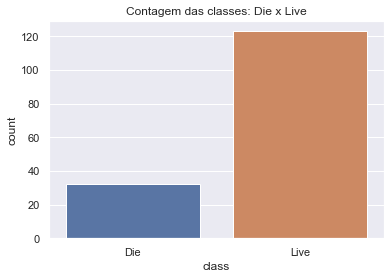

In [532]:
ax = sns.countplot(df['class'])
ax.set(xticklabels=target_label)
plt.title('Contagem das classes: Die x Live')

In [533]:
# Quantos homens e mulheres? homens(1) e mulheres(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [534]:
sex_labels = {'homens':1, 'mulheres':2}

In [535]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

[[Text(0, 0, 'homens'), Text(0, 0, 'mulheres')]]

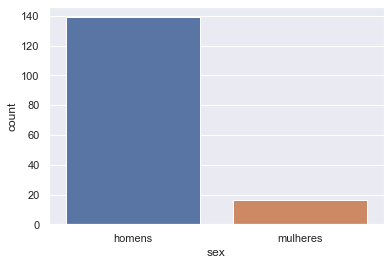

In [536]:
ax = sns.countplot(df['sex'])
ax.set(xticklabels=sex_labels)

Constatações:
Há mais mulheres do que homens no nosso dataset. 
Observar a tendência de resultados enviesados!

In [537]:
# Qual nosso range de idade?
print('Quantidade de idades diferentes: ', df['age'].nunique())
print('Menor idade: ', df['age'].min())
print('Maior idade: ', df['age'].max())

Quantidade de idades diferentes:  49
Menor idade:  7
Maior idade:  78


Vamos agrupar as idades de 10 em 10.

In [538]:
# Definindo os grupos
labels = ['less than 10', '10-20', '20-30','30-40','40-50','50-60', '60-70', '70 and more']
bins = [0,10,20,30,40,50,60,70,80]

In [539]:
# Usando função para cortar
freq_df = df.groupby(pd.cut(df['age'],bins=bins, labels=labels)).size()

In [540]:
freq_df = freq_df.reset_index(name='count')

In [541]:
# Observando a frequencia de cada idade
freq_df

,age,count
0,less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


Text(0.5, 0, 'Contagem')

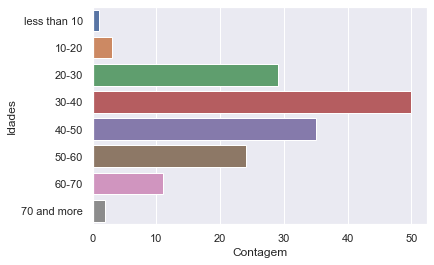

In [542]:
# Plotando a frequencia de cada corte da categoria idade
sns.barplot(freq_df['count'], freq_df['age'])
plt.ylabel('Idades')
plt.xlabel('Contagem')

Constatações:
Maiores incidencias de hepatite são entre 30-40 e 40-50.
Menores incidencias são em individuos abaixo de 10 e com mais de 70.
Obs: Observar viés e o quanto a distribuição dos dados é representativa nessa análise. A incidência da doença é maior por termos mais dados nesta faixa ou o contrário?

# Checando outliers
- Análise univariada
- Análise multivariada

### Métodos:
- Boxplot (Uni / Visual)
- Scatterplot (Multi / Visual)
- Z-Score
- IQR Interquartile Range

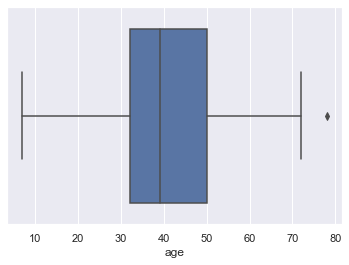

In [543]:
# Utilizando Boxplot para avaliar a detecção Univariada
sns.boxplot(df['age'])

In [544]:
# Podemos ver abaixo que só temos um paciente com registro com 78 anos
# Devido a natureza dos dados podemos deixar esse registro sem problemas
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


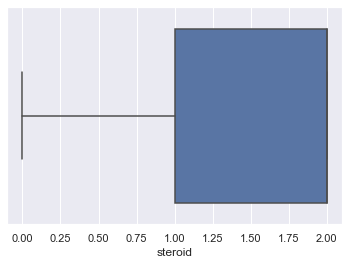

In [545]:
# Usando boxplot para análise
sns.boxplot(df['steroid'])

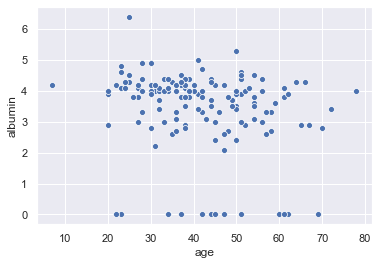

In [546]:
# Scatterplot
# Verificando Age x Albumin
sns.scatterplot(df['age'],df['albumin'])

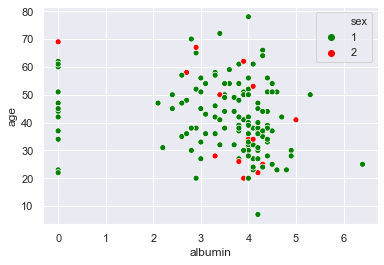

In [547]:
# Scatterplot
# Verificando Age x Albumin com indicadores de sexo
sns.scatterplot(y=df['age'],x=df['albumin'], hue=df['sex'], palette=['green','red'])

In [548]:
# Usando Interquartile Range (IQR)
# H-Spread / Mid-Spread
# Calculo da disperção e espalhamento dos dados estatisticamente
# IQR = quartil 3 (75%) - quartil 1 (25%)

In [549]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3-q1

In [550]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

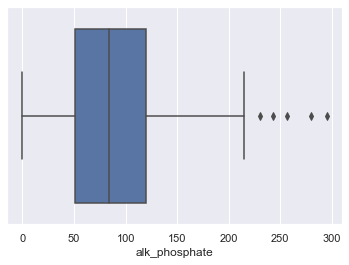

In [551]:
# Podemos verificar novamente com boxplot aqueles que tem número muito alto,
# por exemplo:
sns.boxplot(df['alk_phosphate'])

In [552]:
# Pegar os pontos que são de fato outliers de acordo com a análise estatistica
(df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


Pontos com **TRUE** são outliers.
Soluções:
- Remover
- Mudá-los
- Ignorar

In [553]:
# Supondo que retirariamos todos os pontos considerados como outliers em suas colunas
df_no_outliers = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

In [554]:
# Retirando Outliers
df_no_outliers.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


In [556]:
# Quanta informação seria perdida?
print(df.shape)
print(df_no_outliers.shape)

(155, 20)
(43, 20)


Muita informação perdida excluindo os Outliers relativos de todas as colunas. 

### Verificando visualmente a perda dos dados

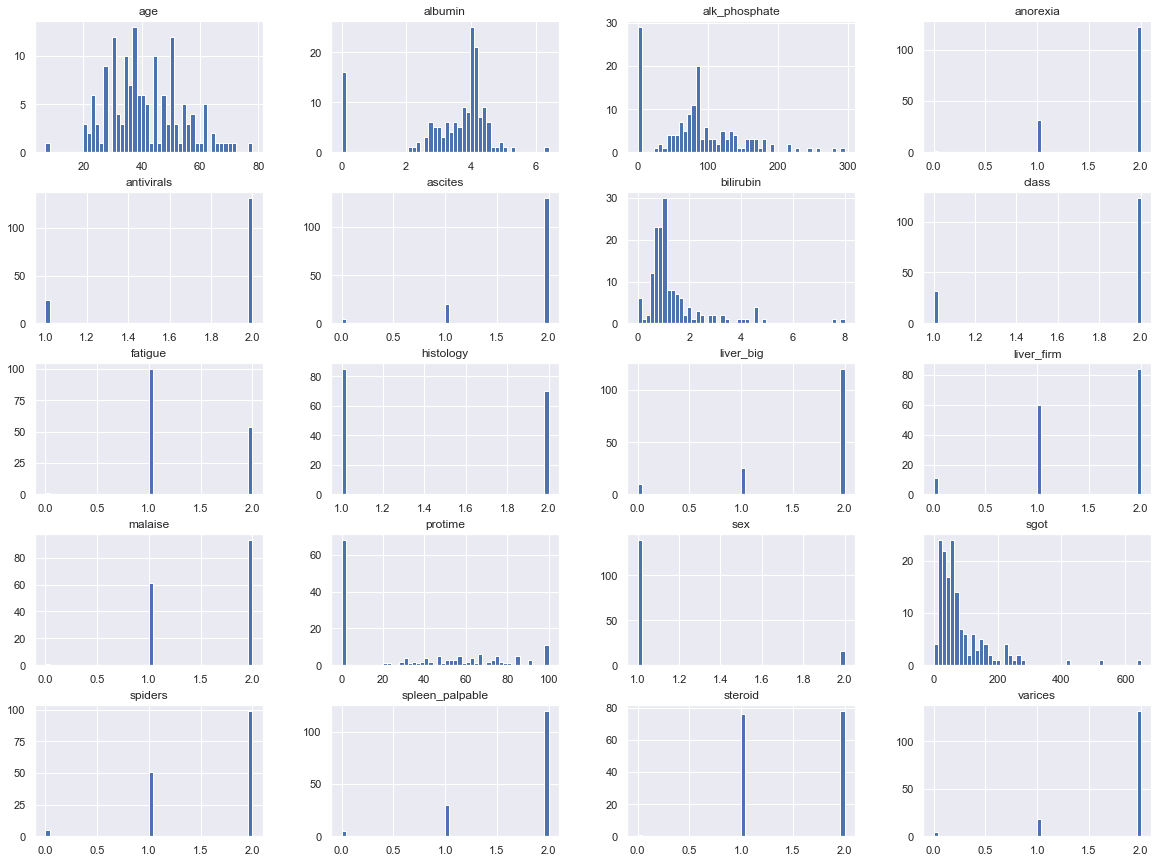

In [235]:
# Distribuição dos dados
df.hist(bins=50, figsize=(20,15))
plt.show()

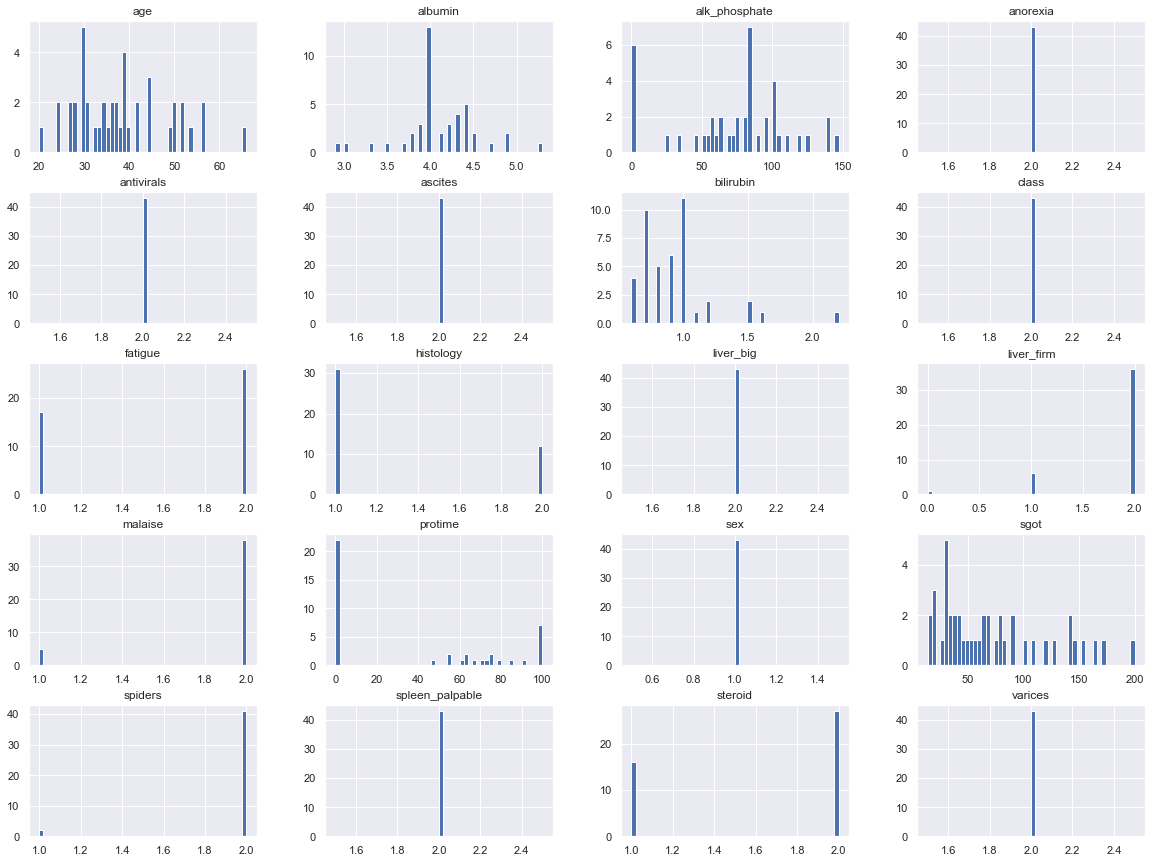

In [557]:
# Distribuiçã dos dados
df_no_outliers.hist(bins=50, figsize=(20,15))
plt.show()

Para esta análise vamos supor que há discrepância natural de dados.

# Seleção de váriaveis

- Selecionando as váriaveis mais fortes (mais relação com target)
- Eliminação recursiva

In [238]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [239]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [240]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [251]:
xfeatures = df[df.columns[1:]]
ylabels = df[df.columns[0]]

In [253]:
# Usando Skbest
# K =  qtde de váriaveis
# score_func => Qual função usaremos para avaliar a força, neste caso chi-quadrado
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [266]:
# Mostrando melhores váriaveis (em DataFrame)
best_features = pd.DataFrame({'Features':xfeatures.columns,'Scores':best_feature_fit.scores_}).sort_values('Scores',ascending=False)
best_features.head(10) #top10

,Features,Scores
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


In [271]:
# Features Recursivas
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 8)

In [274]:
# Devemos fitar um modelos para utilizar este processo
rfe_fit = rfe.fit(xfeatures, ylabels)

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [301]:
dic_df = {'Features':xfeatures.columns, 'Ranking':rfe_fit.ranking_, 'Retirar?':rfe_fit.support_}

In [303]:
# As váriaveis com TRUE são as ''menos importantes'' de acordo com o RFE

rfe_df = pd.DataFrame(dic_df).sort_values('Ranking', ascending=False)
rfe_df.head(10)

,Features,Ranking,Retirar?
17,protime,12,False
14,alk_phosphate,11,False
15,sgot,10,False
3,antivirals,9,False
0,age,8,False
9,spleen_palpable,7,False
8,liver_firm,6,False
2,steroid,5,False
7,liver_big,4,False
12,varices,3,False


### Importância de Features

In [304]:
from sklearn.ensemble import ExtraTreesClassifier

In [306]:
# Inicializando
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [309]:
# importancias
print(et_clf.feature_importances_)

[0.05977242 0.01966199 0.03017691 0.01182798 0.02814301 0.05134339
 0.02859533 0.0373343  0.05065747 0.04521381 0.07224149 0.08707398
 0.05368637 0.09635405 0.06989495 0.05068304 0.07249568 0.06383016
 0.07101366]


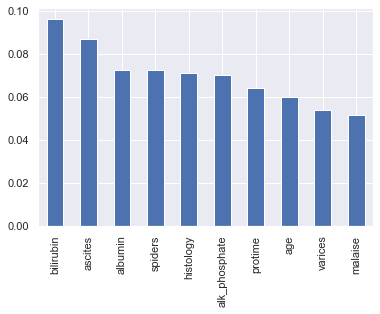

In [318]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns).sort_values(ascending=False)
feature_importance_df.head(10).plot(kind='bar')

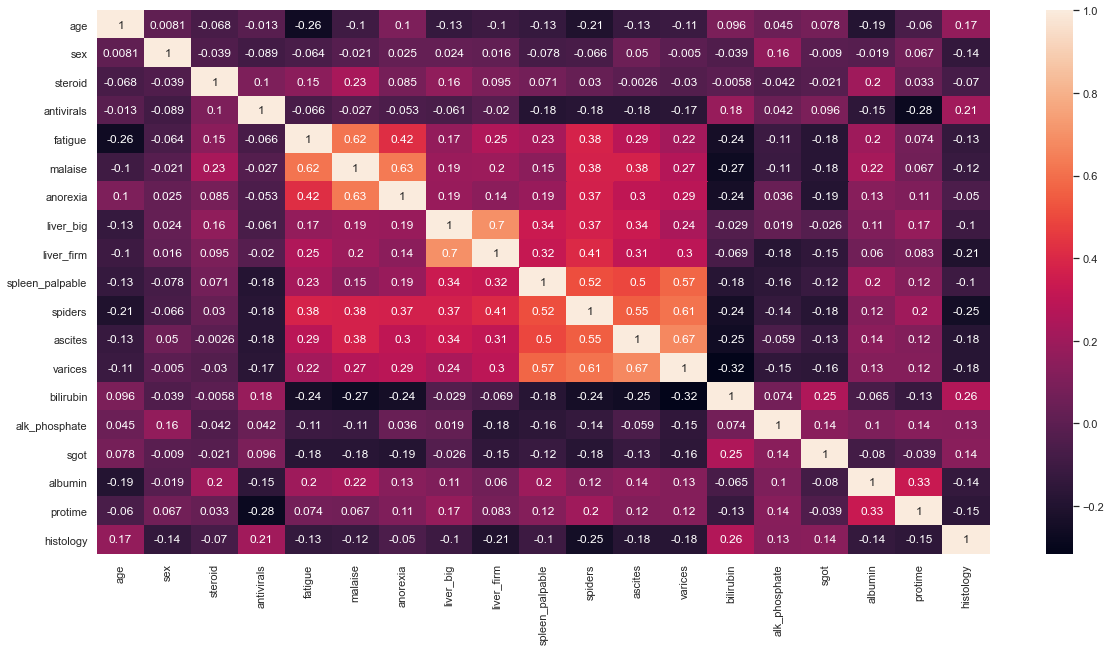

In [323]:
# Observando correlações
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

### Construção dos modelos

- Features e Labels
- Train/Test Split
- LogisticRegression
- Random Forest 
- DecisionTree
- KNN

In [401]:
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metricas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [326]:
# Features para dados
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [387]:
# Criando dois modelos, um para dataframe completo e outro usando selecionados

features_full = list(df.columns)
features_select = list(best_features.nlargest(12, 'Scores')['Features'])

In [388]:
# Divisão geral
X_train, X_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=7)

In [389]:
# Divisão com melhores features
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(xfeatures[features_select], ylabels, test_size=0.3, random_state=7)

### Logistic Regression

In [390]:
# Criando modelos
logreg = LogisticRegression()
logreg.fit(X_train,y_train);

logreg_b = LogisticRegression()
logreg_b.fit(X_train_b, y_train_b);

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [391]:
# Acurácia 
print('Print Modelo c/ todas váriaveis: ', logreg.score(X_test, y_test))
print('Print Modelo c/ seleção de váriaveis: ', logreg_b.score(X_test_b, y_test_b))

Print Modelo c/ todas váriaveis:  0.723404255319149
Print Modelo c/ seleção de váriaveis:  0.723404255319149


A váriavel mais forte aparentemente é a única que influencia no modelo para a Regressão Logistica, por isso temos pouca relevancia na escolha das váriaveis. Devemos nos atentar a diferença nos próximos modelos

### Decision Tree

In [420]:
# Decision Tree com seleção de váriaveis
clf_b = DecisionTreeClassifier()
clf_b.fit(X_train_b, y_train_b)
clf_b.score(X_test_b, y_test_b)

0.7659574468085106

In [425]:
# Decision Tree com todas váriaveis
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7446808510638298

### Plotando Decision Tree

In [430]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [429]:
target_names = ['Die','Live']

In [435]:
# Criar grafico
dot_data = tree.export_graphviz(clf_b, out_file=None, feature_names=features_select, class_names=target_names)

# Desenhar gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

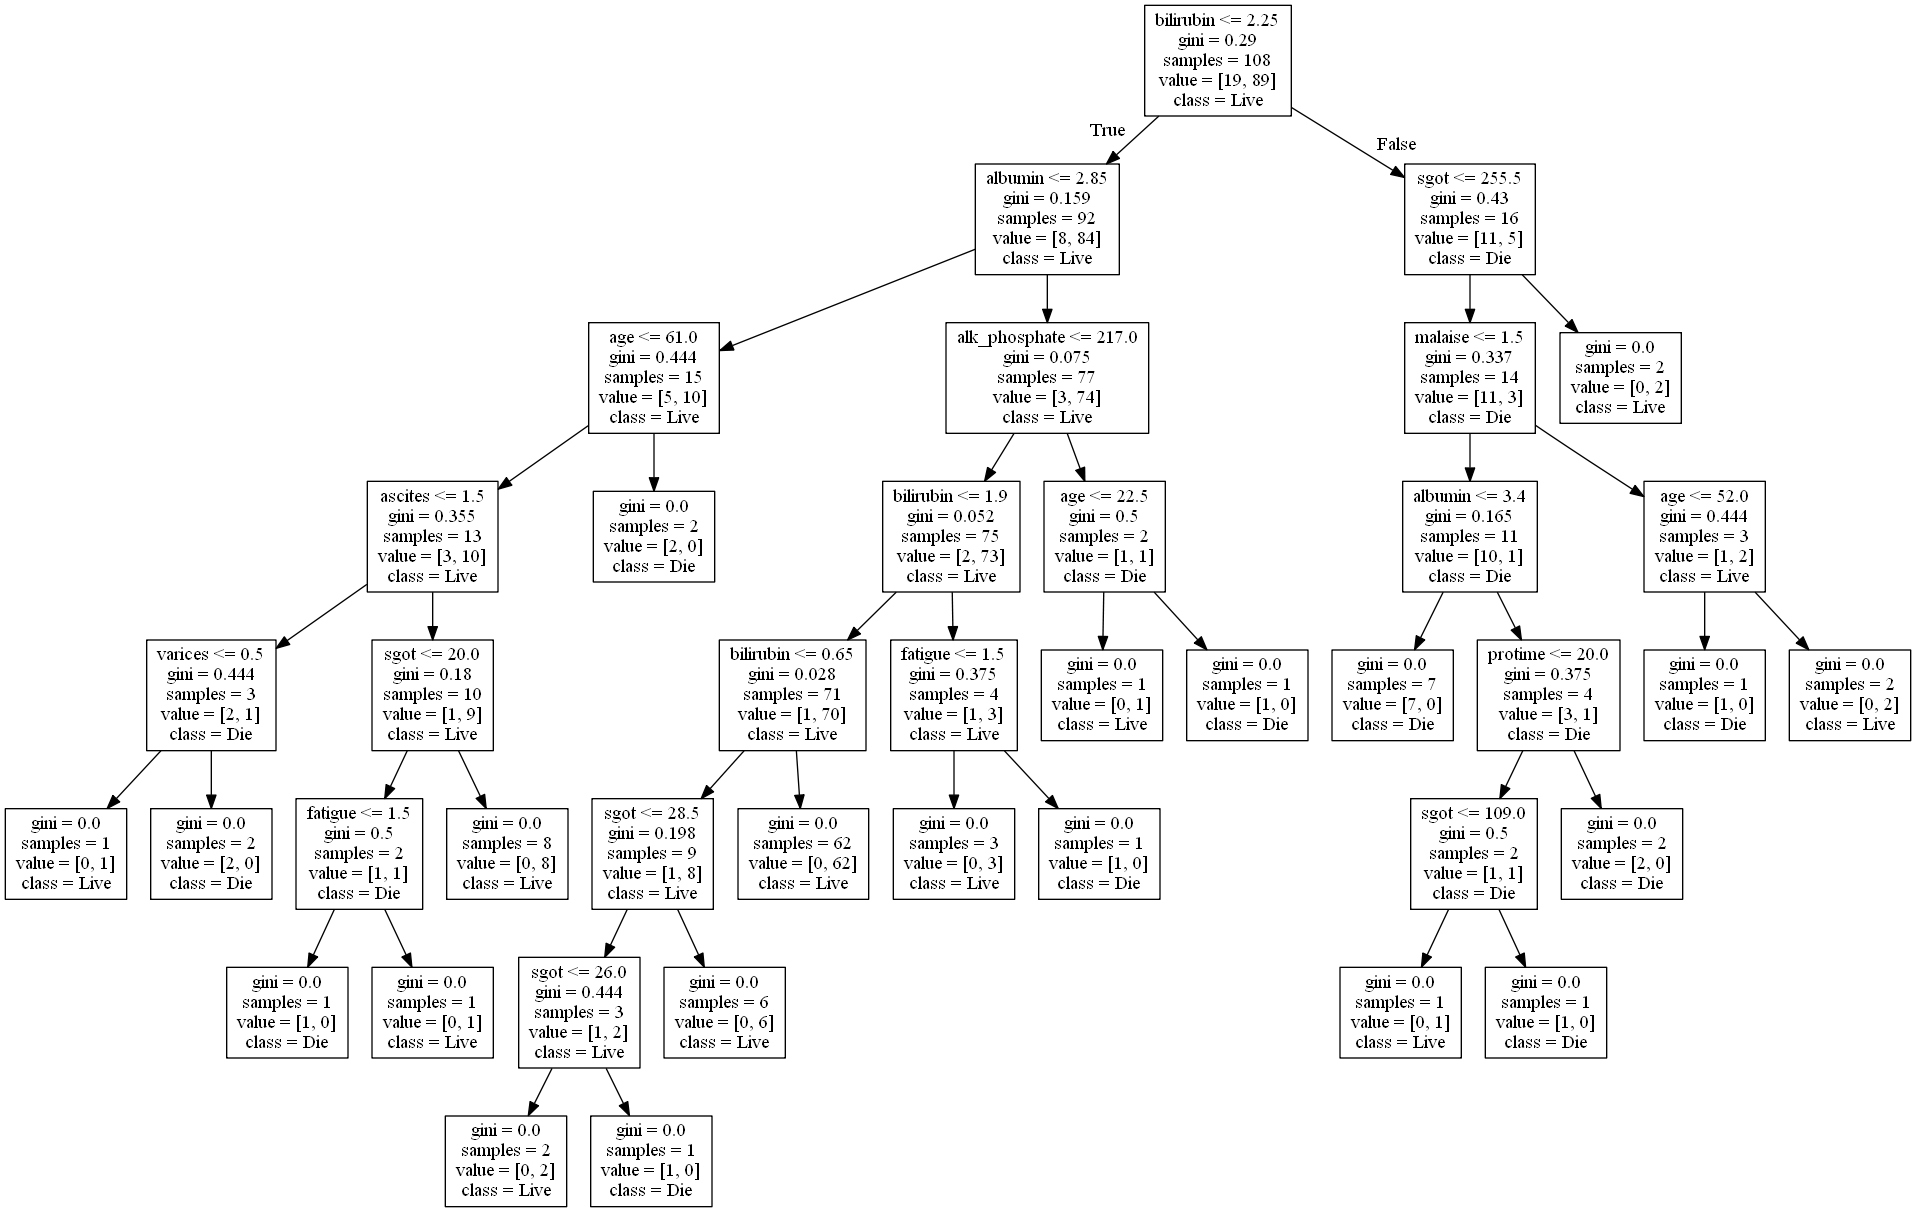

In [437]:
Image(graph.create_png())

In [439]:
# Salvar o plot
graph.write_png('decision_tree_plot.png')

True

Podemos perceber que num modelo não-linear a força das váriaveis selecionadas é mais relevante!

### KNN

In [558]:
# Decision Tree com todas variaveis

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7446808510638298

In [559]:
# Decision Tree com seleção de variaveis

knn_b = KNeighborsClassifier(3)
knn_b.fit(X_train_b, y_train_b)
knn_b.score(X_test_b, y_test_b)

0.7446808510638298

Mesma situação da Regressão Logistica, as decisões independem das váriaveis não-selecionadas.

### Random Forest

In [415]:
# Random Forest com todas variaveis
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7446808510638298

In [416]:
# Decision Tree com seleção de váriaveis
rfc_b = RandomForestClassifier()
rfc_b.fit(X_train_b, y_train_b)
rfc_b.score(X_test_b, y_test_b)

0.7872340425531915

In [417]:
# Nosso melhor resultado foi com RandomForest e váriaveis selecionadas

# Salvando modelo mais efetivo

In [517]:
import joblib

# Modelos com as top 12 váriaveis
model_file = open('random_forest_b.pkl', 'wb')
joblib.dump(rfc_b, model_file)
model_file.close()

# Poderiamos salvar os outros modelos para continuar trabalhando em cima deles também

# Interpretar modelos e avaliar
- Eli5
- Lime
- SHAP
- Skater

In [445]:
!pip install lime

Processing c:\users\patrick\appdata\local\pip\cache\wheels\4c\4f\a5\0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89\lime-0.2.0.1-cp37-none-any.whl


In [446]:
# Lime
import lime
import lime.lime_tabular

#### Lime Explainer
- LimeTabular
- LimeText
- LimeImage

In [564]:
class_names = ['Morto(1)', 'Vivo(2)']

In [565]:
# Criando Explainer de acordo com os dados
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_b.values, 
                                                   feature_names=features_select,
                                                  class_names=class_names,
                                                  discretize_continuous=True)

In [566]:
# Aplicando o Explainer no primeiro exemplo
exp = explainer.explain_instance(X_test_b.iloc[1], rfc_b.predict_proba, num_features=12, top_labels=1)

In [567]:
# Demonstrar os resultados
exp.show_in_notebook(show_table=True, show_all=False)

In [568]:
# Explicando como lista
exp.as_list()

[('bilirubin > 1.50', -0.24090221927733865),
 ('spiders <= 1.00', -0.05107789751327695),
 ('2.98 < albumin <= 4.00', 0.033547880934511505),
 ('protime <= 0.00', -0.02544050025779402),
 ('histology <= 1.00', 0.022977630690207876),
 ('age > 50.25', -0.022145496313378456),
 ('1.00 < malaise <= 2.00', 0.015936249567446797),
 ('sgot > 90.50', 0.015378914265930908),
 ('alk_phosphate > 119.25', -0.011153001583469864),
 ('fatigue <= 1.00', -0.006192280813636153),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [569]:
# Usando eli5
!pip install eli5

In [570]:
import eli5

In [571]:
# Demonstrar contribuição de cada feature
eli5.show_weights(rfc_b,feature_names=features_select, top=10, target_names=class_names)

Weight,Feature
0.2621 ± 0.3396,bilirubin
0.1407 ± 0.2410,albumin
0.1089 ± 0.1845,alk_phosphate
0.0920 ± 0.1589,age
0.0855 ± 0.1322,sgot
0.0818 ± 0.2275,ascites
0.0534 ± 0.1292,protime
0.0470 ± 0.0955,spiders
0.0430 ± 0.1336,varices
0.0404 ± 0.1006,malaise


In [572]:
# Demonstrar contribuição de cada feature
eli5.show_prediction(rfc_b,X_test_b.iloc[1],feature_names=features_select, top=10, target_names=class_names)

In [573]:
# Validação do modelo de classificação

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [574]:
y_pred_rfc = rfc_b.predict(X_test_b).reshape(-1,1)

In [575]:
print('Acurácia: ', accuracy_score(y_test, y_pred_rfc))

Acurácia:  0.7872340425531915


Confusion Matrix: 


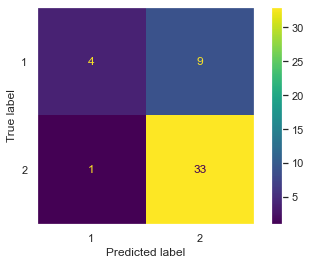

In [576]:
print('Confusion Matrix: ')
plot_confusion_matrix(rfc_b, X_test_b, y_test_b)
plt.grid(False)

In [577]:
print('Classification Report: ')
print(classification_report(y_test, y_pred_rfc,target_names=class_names))

Classification Report: 
              precision    recall  f1-score   support

    Morto(1)       0.80      0.31      0.44        13
     Vivo(2)       0.79      0.97      0.87        34

    accuracy                           0.79        47
   macro avg       0.79      0.64      0.66        47
weighted avg       0.79      0.79      0.75        47

